In [105]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.tree import DecisionTreeClassifier

In [106]:
# Parameters
n_classes = 3
plot_colors = 'ryb'
plot_step = 0.02
# load dataset
iris = load_iris()

In [ ]:
for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]):
    # Predictions only by 2 features
    X = iris.data[:, pair]
    # All targets
    y = iris.target
    # set up a model based on 2 features
    clf = DecisionTreeClassifier().fit(X, y)
    # 6 subplots with index +1
    ax = plt.subplot(2, 3, pairidx + 1)
    # make a little bit of beaty
    plt.tight_layout(h_pad = 0.5, w_pad = 0.5, pad = 2.5)
    #  Displaying decision boundary for each pair of features
    DecisionBoundaryDisplay.from_estimator(clf, X, cmap = plt.cm.RdYlBu, ax = ax, 
                                          xlabel = iris.feature_names[pair[0]],
                                          ylabel = iris.feature_names[pair[1]])   

    # set up the loop for 3 classes of data and coloring then in 3 colors
    for i, color in zip(range(n_classes), plot_colors):
        # an array of target indexes whose values are equal to i(0, 1, 2)
        idx = np.where(y == i)
        # scatter diagramm with x = 1 feature and y = 2 feature
        plt.scatter(X[idx, 0], X[idx, 1], c = color,
                    label = iris.target_names[i], cmap = plt.cm.RdYlBu,
                    edgecolor = 'black', s = 15)
        
plt.suptitle("Decision surface of decision trees trained on pairs of features")
plt.legend(loc = "lower right", borderpad = 0, handletextpad = 0)
_ = plt.axis("tight")

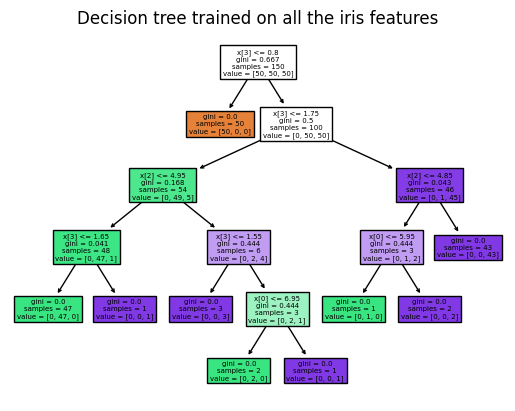

In [107]:
from sklearn.tree import plot_tree

plt.figure()
clf = DecisionTreeClassifier().fit(iris.data, iris.target)
plot_tree(clf, filled = True)
plt.title("Decision tree trained on all the iris features")
plt.show()